importing the modules

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import datetime

importing the dataset

In [11]:
df = pd.read_csv("uber.csv")
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], utc=True)
df['hour'] = df['pickup_datetime'].dt.hour  # Extract hour for time clustering
df['month'] = df['pickup_datetime'].dt.month  # Extract month for seasonal trends

normalizing the dataset

In [12]:
location_features = df[['pickup_latitude', 'pickup_longitude']]
time_features = df[['hour']]
multi_dim_features = df[['pickup_latitude', 'pickup_longitude', 'hour']]
monthly_trend_features = df[['month']]
scaler = StandardScaler()
location_scaled = scaler.fit_transform(location_features)
time_scaled = scaler.fit_transform(time_features)
multi_dim_scaled = scaler.fit_transform(multi_dim_features)
monthly_scaled = scaler.fit_transform(monthly_trend_features)

finding the value of k

In [15]:
def plot_elbow(data, title):
    inertia = []
    k_range = range(1, 6)  # Checking for 1 to 5 clusters
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(6, 4))
    plt.plot(k_range, inertia, marker='o', linestyle='--')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
    plt.title(title)
    plt.show()

applying k means clustering

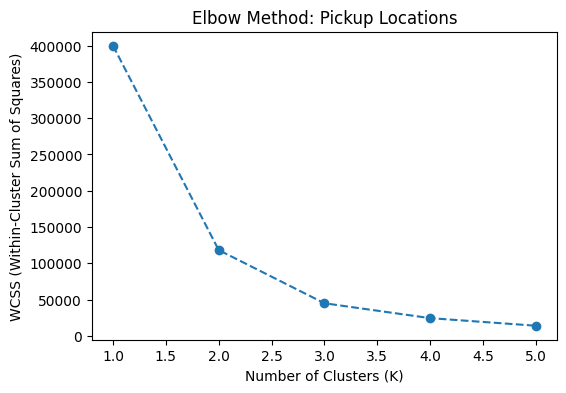

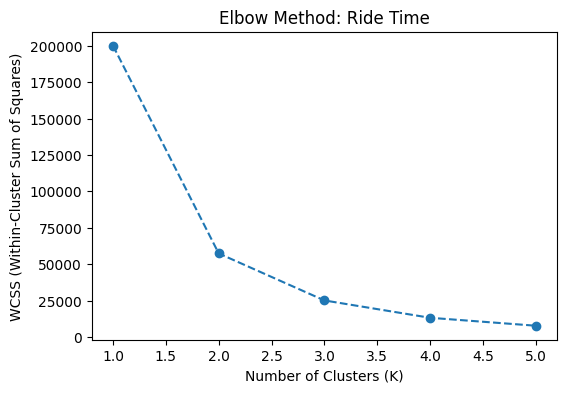

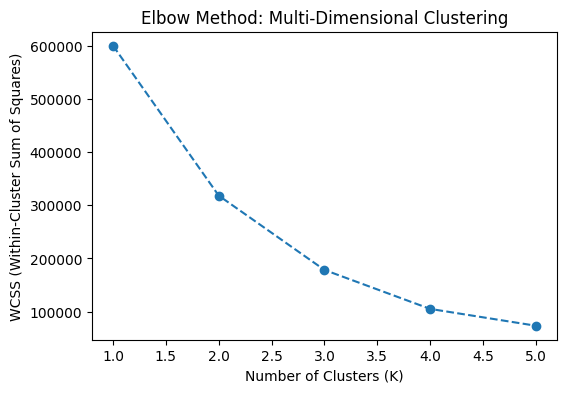

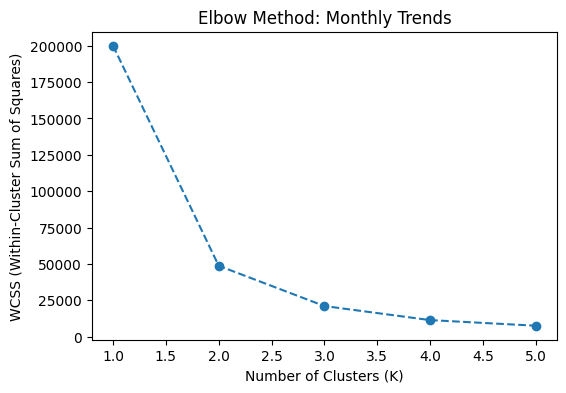

In [16]:
plot_elbow(location_scaled, "Elbow Method: Pickup Locations")
plot_elbow(time_scaled, "Elbow Method: Ride Time")
plot_elbow(multi_dim_scaled, "Elbow Method: Multi-Dimensional Clustering")
plot_elbow(monthly_scaled, "Elbow Method: Monthly Trends")
kmeans_location = KMeans(n_clusters=3, random_state=42, n_init=10).fit(location_scaled)
df['location_cluster'] = kmeans_location.labels_

kmeans_time = KMeans(n_clusters=3, random_state=42, n_init=10).fit(time_scaled)
df['time_cluster'] = kmeans_time.labels_

kmeans_multi = KMeans(n_clusters=3, random_state=42, n_init=10).fit(multi_dim_scaled)
df['multi_dim_cluster'] = kmeans_multi.labels_

kmeans_monthly = KMeans(n_clusters=3, random_state=42, n_init=10).fit(monthly_scaled)
df['monthly_cluster'] = kmeans_monthly.labels_

visulizing the k means clustering

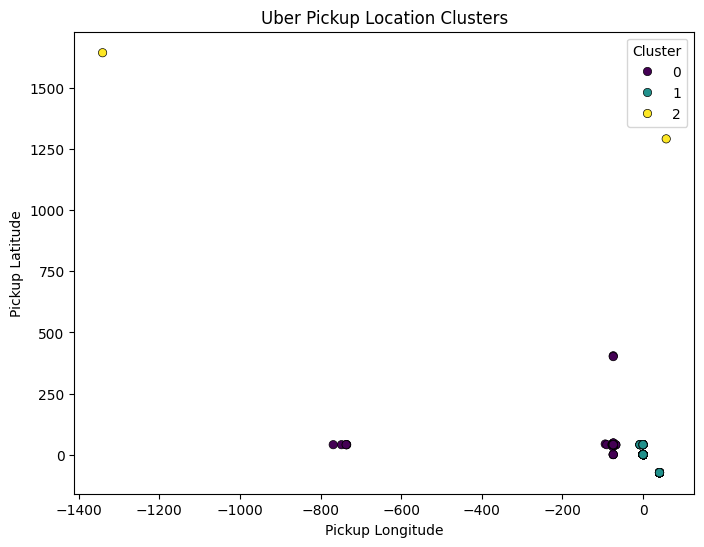

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['pickup_longitude'], y=df['pickup_latitude'],
                hue=df['location_cluster'], palette='viridis', edgecolor='black')
plt.xlabel("Pickup Longitude")
plt.ylabel("Pickup Latitude")
plt.title("Uber Pickup Location Clusters")
plt.legend(title="Cluster")
plt.show()

pickup location clusters

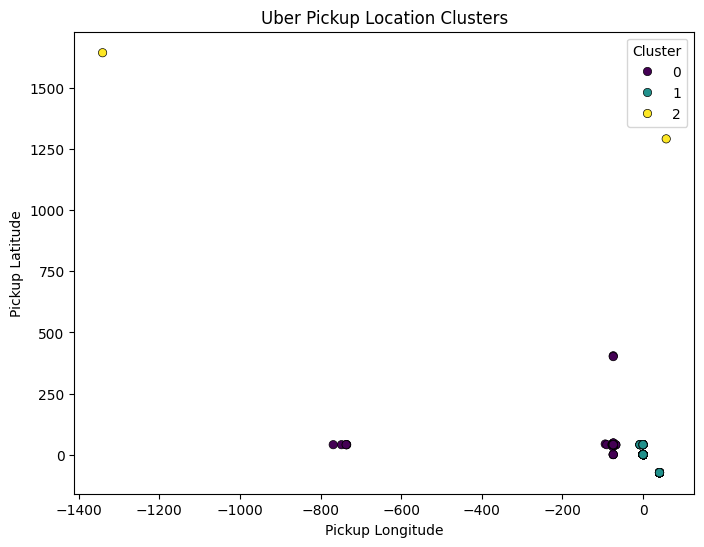

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['pickup_longitude'], y=df['pickup_latitude'],
                hue=df['location_cluster'], palette='viridis', edgecolor='black')
plt.xlabel("Pickup Longitude")
plt.ylabel("Pickup Latitude")
plt.title("Uber Pickup Location Clusters")
plt.legend(title="Cluster")
plt.show()

time based clusters

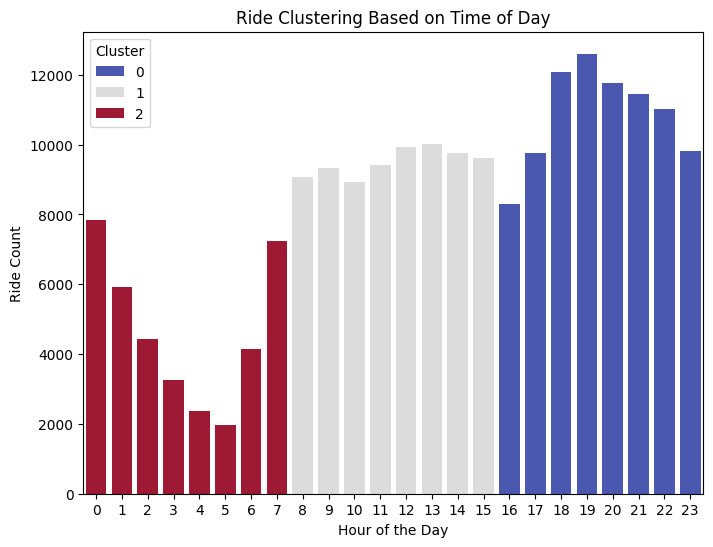

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df['hour'], hue=df['time_cluster'], palette='coolwarm')
plt.xlabel("Hour of the Day")
plt.ylabel("Ride Count")
plt.title("Ride Clustering Based on Time of Day")
plt.legend(title="Cluster")
plt.show()

seasonal trends

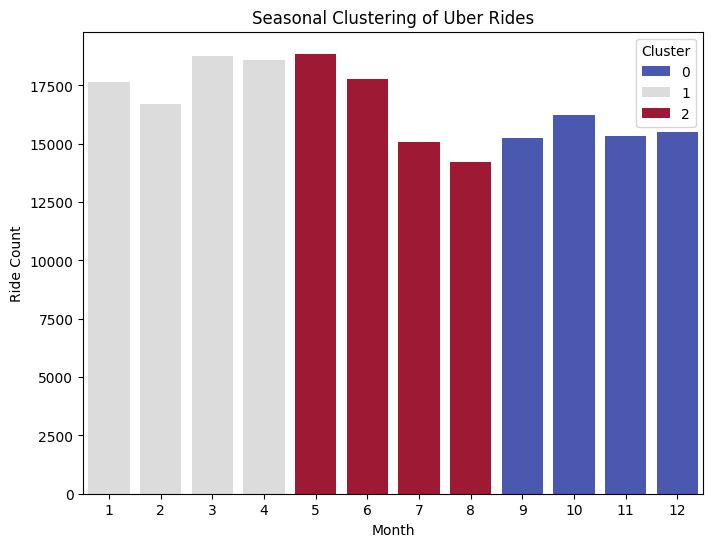

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df['month'], hue=df['monthly_cluster'], palette='coolwarm')
plt.xlabel("Month")
plt.ylabel("Ride Count")
plt.title("Seasonal Clustering of Uber Rides")
plt.legend(title="Cluster")
plt.show()


plotting anomolous pickup points

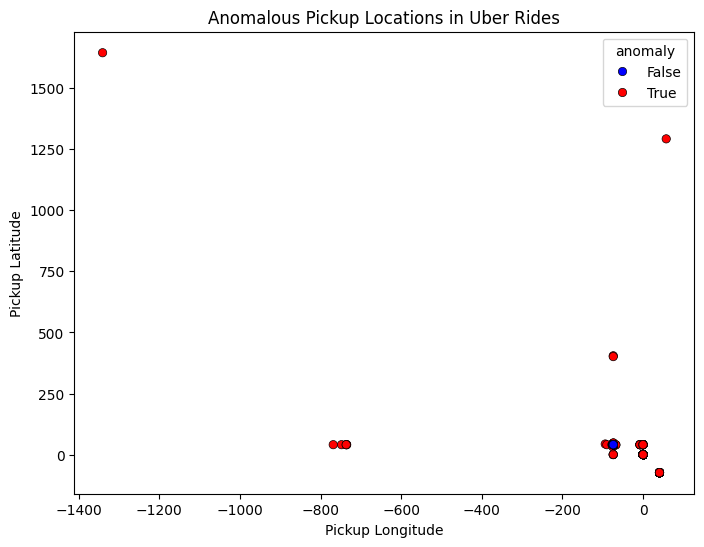

In [21]:
df['distance_from_center'] = np.linalg.norm(location_scaled - kmeans_location.cluster_centers_[df['location_cluster']], axis=1)
threshold = np.percentile(df['distance_from_center'], 95)  # Top 5% as anomalies
df['anomaly'] = df['distance_from_center'] > threshold

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['pickup_longitude'], y=df['pickup_latitude'], hue=df['anomaly'], palette={True: 'red', False: 'blue'}, edgecolor='black')
plt.xlabel("Pickup Longitude")
plt.ylabel("Pickup Latitude")
plt.title("Anomalous Pickup Locations in Uber Rides")
plt.show()